In [1]:
!pip install vtk

In [2]:
import matplotlib.pyplot as plt

In [3]:
!pip install "pyvista[jupyter]"

In [4]:
import pyvista as pv

In [5]:
!pip install trame

In [6]:
# from pyvista import examples
# mesh = examples.download_st_helens()
# warped = mesh.warp_by_scalar('Elevation')
# surf = warped.extract_surface().triangulate()
# surf = surf.decimate_pro(0.75)  # reduce the density of the mesh by 75%
# surf.plot(cmap='gist_earth')

In [7]:
pv.Report(gpu=True)

--------------------------------------------------------------------------------
  Date: Mon Aug 12 14:13:41 2024 PDT

                  OS : Darwin (macOS 14.5)
              CPU(s) : 10
             Machine : arm64
        Architecture : 64bit
                 RAM : 16.0 GiB
         Environment : Jupyter
         File system : apfs
          GPU Vendor : Apple
        GPU Renderer : Apple M2 Pro
         GPU Version : 4.1 Metal - 88.1
    MathText Support : True

  Python 3.12.2 | packaged by Anaconda, Inc. | (main, Feb 27 2024, 12:57:28)
  [Clang 14.0.6 ]

             pyvista : 0.44.1
                 vtk : 9.3.1
               numpy : 1.26.4
          matplotlib : 3.8.4
              scooby : 0.10.0
               pooch : 1.8.2
              pillow : 10.3.0
               PyQt5 : 5.15.10
             IPython : 8.20.0
          ipywidgets : 8.1.2
               scipy : 1.12.0
                tqdm : 4.65.0
          jupyterlab : 4.0.11
               trame : 3.6.3
        trame_client : 3.2.1
        trame_server : 3.0.3
           trame_vtk : 2.8.9
       trame_vuetify : 2.6.2
jupyter_server_proxy : 4.3.0
        nest_asyncio : 1.6.0
--------------------------------------------------------------------------------

In [8]:
volume = pv.read('boussinesq2d.vti')

In [9]:
type(volume)

pyvista.core.grid.ImageData

In [10]:
v = volume.cast_to_rectilinear_grid()

In [11]:
v

RectilinearGrid (0x17795f100)
  N Cells:      133802000
  N Points:     135067500
  X Bounds:     -5.000e-01, 5.000e-01
  Y Bounds:     -5.000e-01, 2.500e+00
  Z Bounds:     0.000e+00, 2.000e+01
  Dimensions:   150, 450, 2001
  N Arrays:     2

In [12]:
temp = v.compute_derivative(scalars='u',gradient='du')

In [13]:
temp

RectilinearGrid (0x1779bd2a0)
  N Cells:      133802000
  N Points:     135067500
  X Bounds:     -5.000e-01, 5.000e-01
  Y Bounds:     -5.000e-01, 2.500e+00
  Z Bounds:     0.000e+00, 2.000e+01
  Dimensions:   150, 450, 2001
  N Arrays:     3

In [14]:
temp = temp.compute_derivative(scalars='v',gradient='dv')

In [15]:
# bounds = volume.bounds
# _, _, _, _, zmin, zmax = bounds

# # Determine the number of slices in the Z dimension
# nz = volume.dimensions[2]

# # Create a PyVista plotter
# plotter = pv.Plotter()

# # Loop over each slice in the Z dimension
# for i in range(nz):
#     # Extract the i-th slice
#     slice = volume.slice(normal=[1, 0, 0], origin=[0, 0, zmin + i])
    
#     # Add the slice to the plotter with a label
#     plotter.add_mesh(slice, name=f"Slice {i}", opacity=0.5)
#     break
# # Set the plotter to update the Z axis as the time step
# plotter.show_grid()
# plotter.view_xy()

In [16]:
temp

RectilinearGrid (0x1779bd120)
  N Cells:      133802000
  N Points:     135067500
  X Bounds:     -5.000e-01, 5.000e-01
  Y Bounds:     -5.000e-01, 2.500e+00
  Z Bounds:     0.000e+00, 2.000e+01
  Dimensions:   150, 450, 2001
  N Arrays:     4

In [17]:
import numpy as np

In [18]:
def gradients_to_dict(arr, name):
    """A helper method to label the gradients into a dictionary."""
    keys = np.array(
        [f"{name}/dx", f"{name}/dy", f"{name}/dt"],
    )
    return dict(zip(keys, temp[name].T))

du = gradients_to_dict(temp, 'du')
dv = gradients_to_dict(temp, 'dv')

In [19]:
temp.point_data.update(du)

In [20]:
temp['u'].shape

(135067500,)

In [21]:
temp

RectilinearGrid (0x1779bd120)
  N Cells:      133802000
  N Points:     135067500
  X Bounds:     -5.000e-01, 5.000e-01
  Y Bounds:     -5.000e-01, 2.500e+00
  Z Bounds:     0.000e+00, 2.000e+01
  Dimensions:   150, 450, 2001
  N Arrays:     7

In [22]:
temp.point_data.update(dv)

In [23]:
temp

RectilinearGrid (0x1779bd120)
  N Cells:      133802000
  N Points:     135067500
  X Bounds:     -5.000e-01, 5.000e-01
  Y Bounds:     -5.000e-01, 2.500e+00
  Z Bounds:     0.000e+00, 2.000e+01
  Dimensions:   150, 450, 2001
  N Arrays:     10

In [24]:
du_dx = temp['du/dx']
du_dy = temp['du/dy']
dv_dx = temp['dv/dx']
dv_dy = temp['dv/dy']

In [25]:
divergence = du_dx + dv_dy
divergence

pyvista_ndarray([0.        , 0.        , 0.        , ..., 0.10204075,
                 0.14119732, 0.15046108], dtype=float32)

In [26]:
divergence

pyvista_ndarray([0.        , 0.        , 0.        , ..., 0.10204075,
                 0.14119732, 0.15046108], dtype=float32)

In [27]:
import numpy as np

In [28]:
np_arr = volume.points

In [29]:
volume.dimensions

(150, 450, 2001)

In [30]:
import math
sub= volume.extract_subset([0,149,0,449,1120,1120])
u = sub['u']
maximum = -math.inf
for i in range(u.shape[0]):
    if u[i] > maximum:
        maximum = u[i]
print(maximum)

0.5431607


In [31]:
max(u)

0.5431607

In [32]:
min(u)

-0.43469393

In [33]:
u_minimum = math.inf
u_maximum = -math.inf

In [34]:
for i in range(0, 2000):
    sub= volume.extract_subset([0,149,0,449,i,i])
    u = sub['u']
    if max(u) > u_maximum:
        u_maximum = max(u)
    if min(u) < u_minimum:
        u_minimum = min(u)
print(f'maximum:{u_maximum}')
print(f'minimum:{u_minimum}')

maximum:0.6312969923019409
minimum:-0.6811115741729736


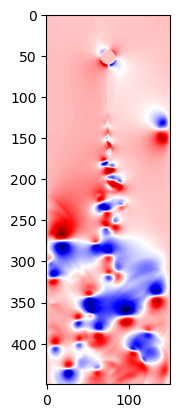

In [35]:
sub= volume.extract_subset([0,149,0,449,1920,1920])
u = sub['u']
plt.imshow(u.reshape(450, 150), cmap='seismic')


In [36]:
sub.points.shape

(67500, 3)

In [37]:
from IPython.display import HTML
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 200  

In [38]:
import matplotlib.animation as animation

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sakolbun/Desktop/GitHubProject/CFD-Datasets/CGL ETH/u/u_0.png'

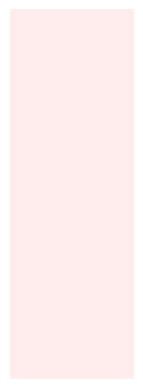

In [39]:
def update_array(i):
    sub = volume.extract_subset([0, 149, 0, 449, i, i])
    return sub['u'].reshape(450, 150)

# Initialize plot
fig_u, ax_u = plt.subplots()
u_initial_data = update_array(0)
cax_u = ax_u.imshow(u_initial_data, cmap='seismic', vmin=u_minimum, vmax=u_maximum)

ax_u.set_xticks([])
ax_u.set_yticks([])
ax_u.axis('off')

# Update function for animation
def update_u(frame):
    data = update_array(frame)
    cax_u.set_array(data)
    plt.savefig(f'u/u_{frame}', bbox_inches='tight', pad_inches=0, dpi=300)
    return cax_u,

# Create animation and save to MP4
num_frames = 2000
u_ani = animation.FuncAnimation(fig_u, update_u, frames=range(num_frames), interval=10, blit=True)
HTML(u_ani.to_jshtml())
# ani.save('animation.mp4', writer='ffmpeg')

In [ ]:
v_minimum = math.inf
v_maximum = -math.inf

In [ ]:
sub= volume.extract_subset([0,149,0,449,1920,1920])
u = sub['u']
plt.imshow(u.reshape(450, 150), cmap='seismic')

In [ ]:
sub= volume.extract_subset([0,149,0,449,1920,1920])
v = sub['v']
plt.imshow(v.reshape(450, 150), cmap='seismic')

In [ ]:
type(u)

In [ ]:
type(v)

In [ ]:
for i in range(0, 2000):
    sub= volume.extract_subset([0,149,0,449,i,i])
    v = sub['v']
    if max(v) > v_maximum:
        v_maximum = max(v)
    if min(v) < v_minimum:
        v_minimum = min(v)
print(f'maximum:{v_maximum}')
print(f'minimum:{v_minimum}')

In [ ]:
def update_array(i):
    sub = volume.extract_subset([0, 149, 0, 449, i, i])
    return sub['v'].reshape(450, 150)

# Initialize plot
fig_v, ax_v = plt.subplots()
v_initial_data = update_array(0)
cax_v = ax_v.imshow(v_initial_data, cmap='seismic', vmin=v_minimum, vmax=v_maximum)

ax_v.set_xticks([])
ax_v.set_yticks([])
ax_v.axis('off')

# Update function for animation
def update_v(frame):
    data = update_array(frame)
    cax_v.set_array(data)
    plt.savefig(f'v/v_{frame}', bbox_inches='tight', pad_inches=0, dpi=300)
    return cax_v,

# Create animation and save to MP4
num_frames = 2000
v_ani = animation.FuncAnimation(fig_v, update_v, frames=range(num_frames), interval=10, blit=True)
HTML(v_ani.to_jshtml())
# ani.save('animation.mp4', writer='ffmpeg')